<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-06-01-tree-based-models-gradient-boosted-survival-model-coxph-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3.6.1  Cox Proportional Hazards-Based Gradient Boosting


The Cox Proportional Hazards-Based Gradient Boosting Model is a powerful machine learning technique used in survival analysis to predict time-to-event outcomes (e.g., death, failure, churn) while handling censored data. It combines the strengths of Cox proportional hazards regression with the predictive power of gradient boosting, enabling flexible, non-linear modeling of survival risks.

This model is particularly useful when traditional linear assumptions of the Cox model are too restrictive, and more complex relationships between features and survival time exist.

## Overview

Survival analysis aims to model the time until an event occurs, with the challenge that some subjects may not experience the event during the study period (right-censored data). The **Cox proportional hazards (Cox PH) model** is a semi-parametric regression model widely used for such tasks.

However, the classical Cox model assumes:
- Linear effects of covariates
- Proportional hazards
- No interactions unless explicitly added

To overcome these limitations, **gradient boosting**—a machine learning ensemble method—can be adapted to optimize the **partial likelihood** of the Cox model. This results in a **boosted Cox model** that learns complex, non-linear patterns in the data by sequentially fitting weak learners (typically decision trees) to improve survival risk predictions.

This approach is implemented in libraries like **XGBoost**, **LightGBM**, and **pyGBM**, using a custom objective function based on the **Cox partial log-likelihood**.

### Key Features

| Feature | Description |
|--------|-------------|
| **Handles Censored Data** | Properly accounts for right-censored observations using partial likelihood. |
| **Non-linear Relationships** | Can capture non-linear effects and feature interactions without manual specification. |
| **Feature Selection** | Built-in importance scoring helps identify influential predictors. |
| **Ensemble Learning** | Combines many weak models (trees) into a strong predictor via boosting. |
| **Flexible Functional Form** | Does not assume linearity; adapts to complex data structures. |
| **Optimizes Cox Objective** | Uses the **negative log partial likelihood** as the loss function. |

### How It Works

1. **Cox Proportional Hazards Model (Baseline)**

The Cox model defines the hazard function for individual $ i $ at time $ t $ as:

$$
h_i(t) = h_0(t) \cdot \exp(\mathbf{x}_i^\top \boldsymbol{\beta})
$$

Where:
- $ h_i(t) $: hazard rate for individual $ i $
- $ h_0(t) $: baseline hazard (non-parametric, unspecified)
- $ \mathbf{x}_i $: vector of covariates
- $ \boldsymbol{\beta} $: coefficients (estimated from data)

The **partial log-likelihood** (used for estimation) is:

$$
\ell(\boldsymbol{\beta}) = \sum_{i: \delta_i = 1} \left[ \mathbf{x}_i^\top \boldsymbol{\beta} - \log\left( \sum_{j \in R(t_i)} \exp(\mathbf{x}_j^\top \boldsymbol{\beta}) \right) \right]
$$

Where:
- $ \delta_i = 1 $ if event observed (not censored)
- $ R(t_i) $: risk set at time $ t_i $ (individuals still under observation just before $ t_i $)

2. **Gradient Boosting Framework with Cox Loss**

Instead of estimating $ \boldsymbol{\beta} $ via maximum likelihood, **gradient boosting** builds a prediction function $ f(\mathbf{x}) $ iteratively:

$$
F_m(\mathbf{x}) = F_{m-1}(\mathbf{x}) + \nu \cdot f_m(\mathbf{x})
$$

Where:
- $ F_m(\mathbf{x}) $: cumulative model after $ m $-th iteration
- $ f_m(\mathbf{x}) $: weak learner (e.g., decision tree) fitted to pseudo-residuals
- $ \nu $: learning rate (shrinkage)

### Step-by-Step Process:

1. **Initialize** model $ F_0(\mathbf{x}) = 0 $ or a constant.
2. For $ m = 1 $ to $ M $:
   a. Compute **negative gradient** (pseudo-residuals) of Cox loss w.r.t. current predictions:
   $$ r_{im} = \delta_i \left[ \mathbf{x}_i - \frac{\sum_{j \in R(t_i)} \mathbf{x}_j \exp(F_{m-1}(\mathbf{x}_j))}{\sum_{j \in R(t_i)} \exp(F_{m-1}(\mathbf{x}_j))} \right] $$
   
   This represents the **score residual** or gradient for individual $ i $.

   b. Fit a **regression tree** $ f_m(\mathbf{x}) $ to the residuals $ r_{im} $.
   c. Update the model:
   
   $$ F_m(\mathbf{x}_i) = F_{m-1}(\mathbf{x}_i) + \nu \cdot f_m(\mathbf{x}_i) $$
      

3. Return final risk score $ \hat{f}(\mathbf{x}) = F_M(\mathbf{x}) $

The output $ \hat{f}(\mathbf{x}) $ is interpreted as the **log partial hazard** — higher values indicate higher risk.

### Advantages

| Advantage | Explanation |
|--------|-------------|
| **Handles Non-linearity** | Automatically captures non-linear and interactive effects without manual transformation. |
| **Robust to Outliers** | Tree-based models are less sensitive to extreme values. |
| **Built-in Regularization** | Techniques like shrinkage, subsampling, and tree depth control prevent overfitting. |
| **High Predictive Accuracy** | Often outperforms traditional Cox models on complex datasets. |
| **Feature Importance** | Provides interpretable metrics (e.g., gain, split count) for understanding key predictors. |
| **Scalable** | Efficient implementations in XGBoost/LightGBM handle large datasets. |


### Limitations

| Limitation | Explanation |
|----------|-------------|
| **Assumes Proportional Hazards** | Still relies on PH assumption unless extended (e.g., time-varying effects added manually). |
| **Black-Box Nature** | Less interpretable than standard Cox models; harder to explain individual predictions. |
| **Computationally Intensive** | Training can be slow with many iterations or large datasets. |
| **Requires Careful Tuning** | Hyperparameters (learning rate, depth, etc.) need optimization. |
| **No Direct Survival Time Prediction** | Outputs risk scores, not survival times or curves (unless calibrated). |
| **Limited Software Support** | Not all boosting libraries support survival objectives natively. |


### Use Cases

- Medical research: Predict patient survival after treatment
- Reliability engineering: Time until machine failure
- Customer analytics: Churn prediction in subscription services
- Finance: Time until loan default

## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized librari

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp311-cp311-linux_x86_64.whl


Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cox Proportional Hazards-Based Gradient Boosting Model in R

This section provides a comprehensive guide to implementing the Cox Proportional Hazards-Based Gradient Boosting Model using R, specifically utilizing the {CoxBoost} package. The steps include loading necessary libraries, preparing the dataset, fitting the model, validating it, and visualizing results.


### Check amd Install Required R Packages

In [ ]:
%%R
# install Coxboost
if (!require("devtools", quietly = TRUE))
    install.packages("devtools",ib='drive/My Drive/R/')
devtools::install_github("binderh/CoxBoost",lib='drive/My Drive/R/')

In [ ]:
%%R
# Explicitly install BiocManager to the specified library path
install.packages("BiocManager", lib='drive/My Drive/R/', repos = "https://cran.rstudio.com/")

In [ ]:
%%R
# install survcomp
if (!require("BiocManager", quietly = TRUE)) {
    install.packages("BiocManager", lib='drive/My Drive/R/')
    # Ensure BiocManager is loaded after installation
    if (!require("BiocManager", quietly = TRUE)) {
        stop("Could not install or load BiocManager")
    }
}

BiocManager::install("survcomp", lib='drive/My Drive/R/', ask = FALSE, force = TRUE)

In [ ]:
%%R
packages <- c('tidyverse',
              'plyr',
              'survival',
              'survivalROC',
              'survminer',
              'survcomp',
              'BiocManager',
              'CoxBoost',
              'pec'

         )

### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Verify Installation

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
  tidyverse        plyr    survival survivalROC   survminer    survcomp 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
BiocManager    CoxBoost         pec 
       TRUE        TRUE        TRUE 


### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:pec"         "package:CoxBoost"    "package:Matrix"     
 [4] "package:BiocManager" "package:survcomp"    "package:prodlim"    
 [7] "package:survminer"   "package:ggpubr"      "package:survivalROC"
[10] "package:survival"    "package:plyr"        "package:lubridate"  
[13] "package:forcats"     "package:stringr"     "package:dplyr"      
[16] "package:purrr"       "package:readr"       "package:tidyr"      
[19] "package:tibble"      "package:ggplot2"     "package:tidyverse"  
[22] "package:tools"       "package:stats"       "package:graphics"   
[25] "package:grDevices"   "package:utils"       "package:datasets"   
[28] "package:methods"     "package:base"       


### Data  and Data Preparation

First, ensure you have the required packages installed and load the `lung` dataset from the `survival` package. The `lung` dataset contains survival data for 228 patients with advanced lung cancer, including variables like `time` (survival time in days), `status` (censoring indicator: 1 = censored, 2 = dead), and covariates like `age`, `sex`, `ph.ecog`, etc.

In [ ]:
%%R
# Set seed for reproducibility
set.seed(123)

# Prepare lung dataset
suppressWarnings(data(lung))
# Remove missing values
lung_complete <- lung %>% na.omit()

# Split into 70% training and 30% testing
n <- nrow(lung_complete)
train_idx <- sample(1:n, size = round(0.7 * n))
train_data <- lung_complete[train_idx, ]
test_data <- lung_complete[-train_idx, ]

# Training data
time_train <- train_data$time
status_train <- train_data$status
X_train <- train_data[, !(names(train_data) %in% c("time", "status"))]
X_train_matrix <- as.matrix(X_train)

# Test data
time_test <- test_data$time
status_test <- test_data$status
X_test <- test_data[, !(names(test_data) %in% c("time", "status"))]
X_test_matrix <- as.matrix(X_test)

# Verify lengths and data summary
cat("Training set: time =", length(time_train),
    ", status =", length(status_train),
    ", X rows =", nrow(X_train_matrix), "\n")
cat("Test set: time =", length(time_test),
    ", status =", length(status_test),
    ", X rows =", nrow(X_test_matrix), "\n")
cat("Training data summary:\n")
print(summary(X_train))
cat("Event rate in training set:", mean(status_train), "\n")
cat("Any NA in X_train_matrix:", any(is.na(X_train_matrix)), "\n")
cat("Any infinite in X_train_matrix:", any(is.infinite(X_train_matrix)), "\n")
cat("Correlation matrix of X_train:\n")
print(cor(X_train_matrix))

Training set: time = 117 , status = 117 , X rows = 117 
Test set: time = 50 , status = 50 , X rows = 50 
Training data summary:
      inst            age             sex           ph.ecog      
 Min.   : 1.00   Min.   :39.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 3.00   1st Qu.:57.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :11.00   Median :64.00   Median :1.000   Median :1.0000  
 Mean   :10.69   Mean   :62.08   Mean   :1.385   Mean   :0.9573  
 3rd Qu.:16.00   3rd Qu.:69.00   3rd Qu.:2.000   3rd Qu.:1.0000  
 Max.   :32.00   Max.   :82.00   Max.   :2.000   Max.   :2.0000  
    ph.karno        pat.karno         meal.cal         wt.loss      
 Min.   : 50.00   Min.   : 30.00   Min.   : 131.0   Min.   :-16.00  
 1st Qu.: 70.00   1st Qu.: 70.00   1st Qu.: 588.0   1st Qu.:  0.00  
 Median : 80.00   Median : 80.00   Median :1025.0   Median :  6.00  
 Mean   : 81.88   Mean   : 80.51   Mean   : 923.4   Mean   :  9.06  
 3rd Qu.: 90.00   3rd Qu.: 90.00   3rd Qu.:1125.0   3rd Qu.: 15.0

### Fit Initial CoxBoost Model


First, we fit an initial CoxBoost model using the training data. This model will be used to estimate the baseline cumulative hazard and compute survival curves.  `CoxBoost()` function is used to fit the model, specifying the time, status, and predictor matrix. The `stepno` parameter controls the number of boosting iterations, and `penalty` is set to 100 for regularization. The `criterion` is set to "pscore" for partial score optimization, and `standardize` is set to TRUE to standardize the predictors.


In [ ]:
%%R
# Fit initial CoxBoost model
initial_model <- CoxBoost(
  time = time_train,
  status = status_train,
  x = X_train_matrix,
  stepno = 100,
  penalty = 100,
  criterion = "pscore",
  standardize = TRUE
)

summary(initial_model)

100 boosting steps resulting in 8 non-zero coefficients  
partial log-likelihood: -157.7046 

parameter estimates > 0:
 inst, sex, pat.karno, meal.cal, wt.loss 
parameter estimates < 0:
 age, ph.ecog, ph.karno 


In [ ]:
%%R
 # variables contained in the fitted object
 names(initial_model)

 [1] "time"             "status"           "event.times"      "weights"         
 [5] "strata"           "stratum"          "stepno"           "xnames"          
 [9] "n"                "p"                "meanx"            "sdx"             
[13] "standardize"      "causes"           "coefficients"     "linear.predictor"
[17] "Lambda"           "scoremat"         "logplik"         


In [ ]:
%%R
# coefficient estimates
dim(initial_model$coefficients)

[1] 101   8


In [ ]:
%%R
# linear predictor estimates
dim(initial_model$linear.predictor)

[1] 101 117


In [ ]:
%%R
# cumulative baseline hazard estimates
dim(initial_model$Lambda)

[1] 101  34


### Prediction and Validation

In [ ]:
%%R
# Initial model validation on test data
# Get risk scores
initial_pred <- predict(initial_model, newdata = X_test_matrix, type = "risk")

# Debug: Check dimensions and content of initial_pred
cat("Dimensions of initial_pred =", dim(initial_pred), "\n")
cat("Length of initial_pred (as vector) =", length(as.vector(initial_pred)), "\n")
cat("First few values of initial_pred:", head(as.vector(initial_pred)), "\n")

Dimensions of initial_pred = 50 106 
Length of initial_pred (as vector) = 5300 
First few values of initial_pred: 0.970567 0.9873503 0.9884359 0.958653 0.9772657 0.9531882 


In [ ]:
%%R
# Handle case where initial_pred is a matrix
if (is.matrix(initial_pred)) {
  cat("initial_pred is a matrix, selecting final column\n")
  # Assign to the global environment
  initial_pred_vec <<- as.vector(initial_pred[, ncol(initial_pred)])
} else {
  # Assign to the global environment
  initial_pred_vec <<- as.vector(initial_pred)
}

initial_pred is a matrix, selecting final column


### C-Index of Initial Model

C-index is a measure of the model's discriminatory ability, indicating how well the model can distinguish between individuals who experience the event and those who do not. A C-index of 0.5 indicates no discrimination (random prediction), while a C-index of 1.0 indicates perfect discrimination.

In [ ]:
%%R
# Custom C-index function as a fallback
custom_cindex <- function(pred, time, status) {
  concordant <- 0
  total_pairs <- 0
  n <- length(time)
  for (i in 1:(n-1)) {
    for (j in (i+1):n) {
      if (status[i] == 1 && status[j] == 1) {
        if (time[i] < time[j] && pred[i] > pred[j]) concordant <- concordant + 1
        if (time[j] < time[i] && pred[j] > pred[i]) concordant <- concordant + 1
        total_pairs <- total_pairs + 1
      } else if (status[i] == 1 && status[j] == 0) {
        if (time[i] < time[j] && pred[i] > pred[j]) concordant <- concordant + 1
        total_pairs <- total_pairs + 1
      } else if (status[j] == 1 && status[i] == 0) {
        if (time[j] < time[i] && pred[j] > pred[i]) concordant <- concordant + 1
        total_pairs <- total_pairs + 1
      }
    }
  }
  if (total_pairs == 0) return(NA)
  return(concordant / total_pairs)
}

In [ ]:
%%R
# Try C-index with survcomp on test data
initial_cindex <- NA
tryCatch({
  initial_cindex <- concordance.index(
    x = initial_pred_vec,
    surv.time = time_test,
    surv.event = status_test,
    method = "noether"
  )$c.index
  cat("survcomp::concordance.index succeeded for initial model\n")
}, error = function(e) {
  cat("survcomp::concordance.index failed for initial model:", e$message, "\n")
  # Fallback 1: Try survivalROC
  tryCatch({
    roc <- survivalROC(
      Stime = time_test,
      status = status_test,
      marker = initial_pred_vec,
      predict.time = median(time_test),
      method = "NNE"
    )
    initial_cindex <<- roc$AUC
    cat("Fallback C-index (AUC at median time) for initial model:", initial_cindex, "\n")
  }, error = function(e2) {
    cat("survivalROC failed for initial model:", e2$message, "\n")
    # Fallback 2: Custom C-index
    initial_cindex <<- custom_cindex(initial_pred_vec, time_test, status_test)
    cat("Custom C-index for initial model:", initial_cindex, "\n")
  })
})

print(paste("Initial model C-index:", round(initial_cindex, 3)))

survcomp::concordance.index succeeded for initial model
[1] "Initial model C-index: 0.301"


### Integrated Brier Score (IBS)

The Integrated Brier Score (IBS) is a metric used to evaluate the predictive performance of survival models, such as the CoxBoost model in your script. It measures the mean squared error of predicted survival probabilities over a specified time range, accounting for censoring

In [ ]:
%%R
eval_times <- seq(0, max(time_test), length.out = 100)
initial_cif <- predict(initial_model, newdata = X_test_matrix, type = "CIF", times = eval_times)
initial_brier <- rep(NA, length(eval_times))
for (i in 1:length(eval_times)) {
  km_fit <- survfit(Surv(time_test, 1 - status_test) ~ 1, data = test_data)
  G_t <- summary(km_fit, times = eval_times[i])$surv
  if (length(G_t) == 0) G_t <- 1
  initial_brier[i] <- mean((as.numeric(time_test > eval_times[i]) - (1 - initial_cif[, i]))^2 / G_t, na.rm = TRUE)
}
initial_ibs <- mean(initial_brier, na.rm = TRUE)
print(paste("Initial model IBS:", round(initial_ibs, 3)))

[1] "Initial model IBS: 0.396"


### Kaplan-Meier baseline IBS

The Kaplan-Meier baseline Integrated Brier Score (IBS) is calculated using the Kaplan-Meier survival estimates as a baseline for comparison. This provides a reference point to evaluate the performance of the CoxBoost model against a non-parametric survival estimate.

In [ ]:
%%R
# Kaplan-Meier baseline IBS
km_fit <- survfit(Surv(time_test, status_test) ~ 1, data = test_data)
km_surv <- summary(km_fit, times = eval_times)$surv
km_brier <- rep(NA, length(eval_times))
for (i in 1:length(eval_times)) {
  G_t <- summary(survfit(Surv(time_test, 1 - status_test) ~ 1), times = eval_times[i])$surv
  if (length(G_t) == 0) G_t <- 1
  km_brier[i] <- mean((as.numeric(time_test > eval_times[i]) - km_surv[i])^2 / G_t, na.rm = TRUE)
}
km_ibs <- mean(km_brier, na.rm = TRUE)
print(paste("Kaplan-Meier baseline IBS:", round(km_ibs, 3)))

[1] "Kaplan-Meier baseline IBS: 0.113"


### Crosss-Validation for Penalty Parameter

Cross-validation is used to select the optimal penalty parameter for the CoxBoost model. The `optimCoxBoostPenalty(` function performs cross-validation, returning the mean log partial likelihood for different penalty values. The optimal penalty is chosen based on the minimum mean log partial likelihood.

In [ ]:
%%R
cv_penalty <-optimCoxBoostPenalty(time = time_train,
                                  status = status_train,
                                  x = X_train_matrix,
                                  trace=TRUE,
                                  start.penalty=500)

In [ ]:
%%R
# the optimal penalty
optimal_penalty<-cv_penalty$penalty
print(paste("Optimal Penalty:", optimal_penalty, "\n"))

[1] "Optimal Penalty: 5120 \n"


### Cross-Validation for Boosting Steps

Cross-validation is also performed to determine the optimal number of boosting steps. The `cv.CoxBoost()` function is used to perform cross-validation, returning the mean log partial likelihood for different step numbers. The optimal number of steps is chosen based on the minimum mean log partial likelihood.

In [ ]:
%%R
# Cross-validation for boosting steps
cv_steps <- tryCatch({
  cv.CoxBoost(
    time = time_train,
    status = status_train,
    x = X_train_matrix,
    maxstepno = 100,
    penalty = 100,
    K = 10,
    type = "verweij"
  )
}, error = function(e) {
  cat("cv.CoxBoost for steps failed:", e$message, "\n")
  cat("Using default stepno = 100\n")
  return(NULL)
})
if (!is.null(cv_steps) && !any(is.na(cv_steps$mean.logplik))) {
  optimal_steps <- which.min(cv_steps$mean.logplik)
} else {
  optimal_steps <- 100
}
cat("Optimal Steps:", optimal_steps, "\n")

Optimal Steps: 101 


### Fit Final Model

Now that we have the optimal penalty and number of steps, we can fit the final CoxBoost model using these parameters. The `CoxBoost()` function is used again, this time with the optimal parameters obtained from cross-validation. The model is fitted on the training data, and a summary of the model is printed.

In [ ]:
%%R
# Fit final model
final_model <- tryCatch({
  CoxBoost(
    time = time_train,
    status = status_train,
    x = X_train_matrix,
    stepno = optimal_steps,
    penalty = optimal_penalty,
    standardize = FALSE
  )
}, error = function(e) {
  cat("CoxBoost final model failed:", e$message, "\n")
  cat("Using default parameters: stepno = 100, penalty = 100\n")
  CoxBoost(
    time = time_train,
    status = status_train,
    x = X_train_matrix,
    stepno = 100,
    penalty = 100,
    standardize = FALSE
  )
})
summary(final_model)

101 boosting steps resulting in 7 non-zero coefficients  
partial log-likelihood: -159.5403 

parameter estimates > 0:
 inst, sex, ph.karno, pat.karno, meal.cal, wt.loss 
parameter estimates < 0:
 age 


### Final model validation on test data

In [ ]:
%%R
# prediction
final_pred <- predict(final_model, newdata = X_test_matrix, type = "risk")
if (is.matrix(final_pred)) {
  final_pred_vec <- as.vector(final_pred[, ncol(final_pred)])
} else {
  final_pred_vec <- as.vector(final_pred)
}

In [ ]:
%%R
# Try C-index for final model
final_cindex <- NA
tryCatch({
  final_cindex <- concordance.index(
    x = final_pred_vec,
    surv.time = time_test,
    surv.event = status_test,
    method = "noether"
  )$c.index
  cat("survcomp::concordance.index succeeded for final model\n")
}, error = function(e) {
  cat("survcomp::concordance.index failed for final model:", e$message, "\n")
  tryCatch({
    roc <- survivalROC(
      Stime = time_test,
      status = status_test,
      marker = final_pred_vec,
      predict.time = median(time_test),
      method = "NNE"
    )
    final_cindex <<- roc$AUC
    cat("Fallback C-index (AUC at median time) for final model:", final_cindex, "\n")
  }, error = function(e2) {
    cat("survivalROC failed for final model:", e2$message, "\n")
    final_cindex <<- custom_cindex(final_pred_vec, time_test, status_test)
    cat("Custom C-index for final model:", final_cindex, "\n")
  })
})
print(paste("Final model C-index:", round(final_cindex, 3)))

survcomp::concordance.index succeeded for final model
[1] "Final model C-index: 0.366"


In [ ]:
%%R
# IBS for final model
final_cif <- predict(final_model, newdata = X_test_matrix, type = "CIF", times = eval_times)
final_brier <- rep(NA, length(eval_times))
for (i in 1:length(eval_times)) {
  km_fit <- survfit(Surv(time_test, 1 - status_test) ~ 1, data = test_data)
  G_t <- summary(km_fit, times = eval_times[i])$surv
  if (length(G_t) == 0) G_t <- 1
  final_brier[i] <- mean((as.numeric(time_test > eval_times[i]) - (1 - final_cif[, i]))^2 / G_t, na.rm = TRUE)
}
final_ibs <- mean(final_brier, na.rm = TRUE)
print(paste("Final model IBS:", round(final_ibs, 3)))

[1] "Final model IBS: 0.391"


### Survival Curves

Finally, we can visualize the survival curves based on the predicted risk scores from the final CoxBoost model. The survival probabilities are computed from the cumulative incidence function (CIF) estimates, and a plot is generated to show the average survival curve across all test samples.

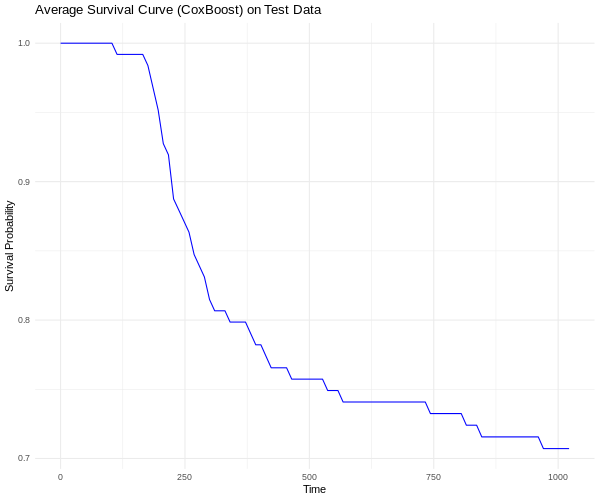

In [ ]:
%%R -w 600 -h 500
# Survival curves
final_cif <- predict(final_model, newdata = X_test_matrix, type = "CIF", times = eval_times)
surv_prob_final <- 1 - final_cif
surv_data <- data.frame(
  time = eval_times,
  surv = colMeans(surv_prob_final)
)
ggplot(surv_data, aes(x = time, y = surv)) +
  geom_line(color = "blue") +
  labs(title = "Average Survival Curve (CoxBoost) on Test Data", x = "Time", y = "Survival Probability") +
  theme_minimal()


### Variable Importance

Variable importance can be assessed by examining the absolute values of the coefficients from the final CoxBoost model. This provides insights into which predictors have the most significant impact on survival risk.

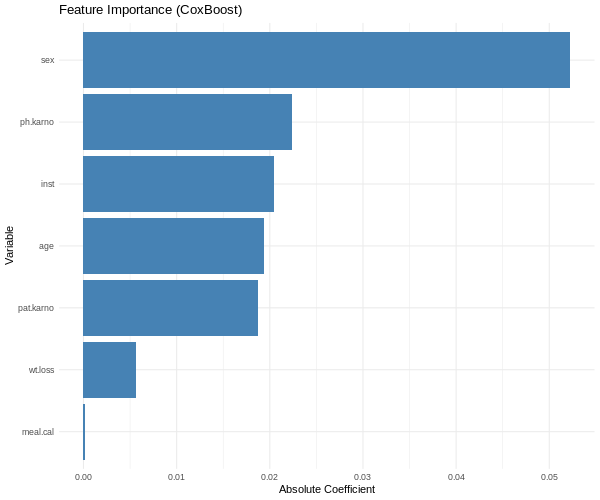

In [ ]:
%%R -w 600 -h 500
# Variable importance

importance <- coef(final_model)
imp_data <- data.frame(
  Variable = colnames(X_train_matrix),
  Importance = abs(importance)
) %>% filter(Importance != 0)

ggplot(imp_data, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Feature Importance (CoxBoost)", x = "Variable", y = "Absolute Coefficient") +
  theme_minimal()

## Summary and Conclusions

The Cox Proportional Hazards-Based Gradient Boosting Model combines the strengths of the Cox model (handling censored survival data) with gradient boosting (capturing non-linear and interaction effects). It works by iteratively building decision trees to minimize the negative log-partial likelihood, updating the hazard function estimate at each step. The model is powerful for complex survival data but assumes proportional hazards, requires careful tuning, and may be less interpretable than simpler models. It’s widely used in fields like medical research and reliability analysis where predicting time-to-event outcomes is critical.

Key takeaways from the implementation in R include:

- The CoxBoost model is a flexible, non-linear approach to survival analysis that extends the Cox proportional hazards model using gradient boosting techniques.
- It effectively handles censored data and captures complex relationships between predictors and survival time.
- The model can be implemented in R using the {CoxBoost} package, which provides functions for fitting, predicting, and evaluating the model.
- Key metrics for evaluating model performance include the C-index (discrimination ability) and the Integrated Brier Score (IBS, calibration).
- Variable importance can be assessed to understand the impact of different predictors on survival risk.

## References


1. **Binder, H., & Schumacher, M. (2008).** "Allowing for mandatory covariates in boosting estimation of sparse and high-dimensional Cox models." *Computational Statistics & Data Analysis, 52*(7), 3671–3682.  

2. **Binder, H. (2013).** "CoxBoost: Boosting for Cox models." *R package version 1.4.* https://cran.r-project.org/package=CoxBoost  

3. **De Bin, R., et al. (2016).** "Investigating the prediction ability of survival models based on clinical and omics data." *Statistics in Medicine, 35*(29), 5310–5325.  

4. **Ma, S., & Huang, J. (2008).** "Regularized ROC method for disease classification and biomarker selection." *Bioinformatics, 24*(23), 2743–2749.  

5. **Binder, H., et al. (2009).** "Boosting for high-dimensional time-to-event data with competing risks." *Bioinformatics, 25*(7), 890–896.  
